In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sn
from wordcloud import WordCloud, STOPWORDS
import pickle

In [2]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [3]:
df = pd.read_csv('../data/interim/incarcerated_df.csv')
df.head()

,text,not_incarcerated
0,20 dollars reward. ranaway from the subscriber...,1
1,15 dollars reward will be paid for the apprehe...,1
2,baltimore august 11 1777. 10 pounds reward. ra...,1
3,90 dollars reward. eloped from the hermitage o...,1
4,50 dollars reward. ranaway from the subscriber...,1


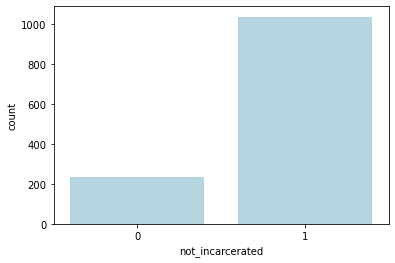

In [4]:
sn.countplot(x = 'not_incarcerated', data = df, color = 'lightblue');

In [5]:
num_top = 20
def top_words(texts, n):
    vec = CountVectorizer(stop_words = 'english').fit(texts)
    BOW = vec.transform(texts)
    sum_words = BOW.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
top_n_not = top_words(df.query('not_incarcerated == 1').text, num_top)
top_n = top_words(df.query('not_incarcerated == 0').text, num_top)

In [24]:
words_not = np.array(top_n_not)[:, 0]
words = np.array(top_n)[:, 0]
counts_not = np.array(top_n_not)[:, 1].astype(int)/len(df.query('not_incarcerated == 1'))
counts = np.array(top_n)[:, 1].astype(int)/len(df.query('not_incarcerated == 0'))
all_words = np.append(words, words_not)
all_counts = np.append(counts, counts_not).astype('float')
labels = np.append(list(np.zeros(num_top)), list(np.ones(num_top)))
tlabels = np.append('jailed ' * num_top, 'not jailed ' * num_top)

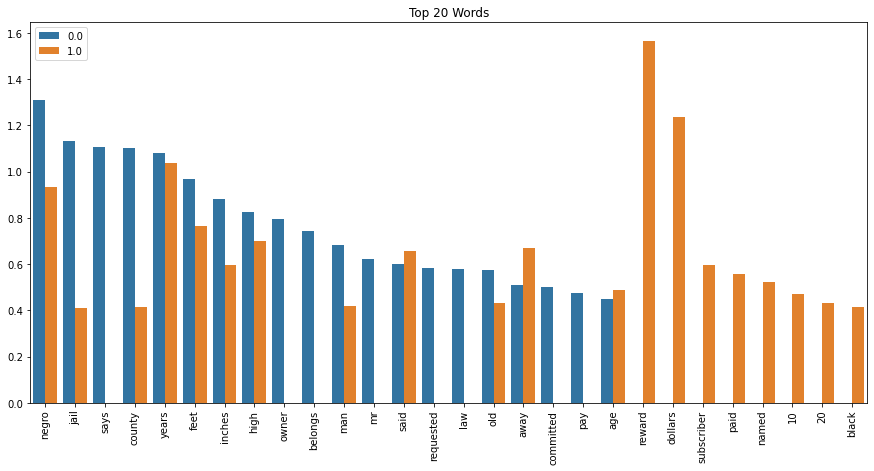

In [27]:
#Greater than one due to multiple occurences in ad
plt.figure(figsize = (15,7))
plt.title('Top {} Words' .format(num_top))
plt.xticks(rotation = 90)
sn.barplot(x = all_words, y = all_counts, hue = labels);

In [29]:
t_df = df.query('not_incarcerated == 1')['text']
z_df = df.query('not_incarcerated == 0')['text']

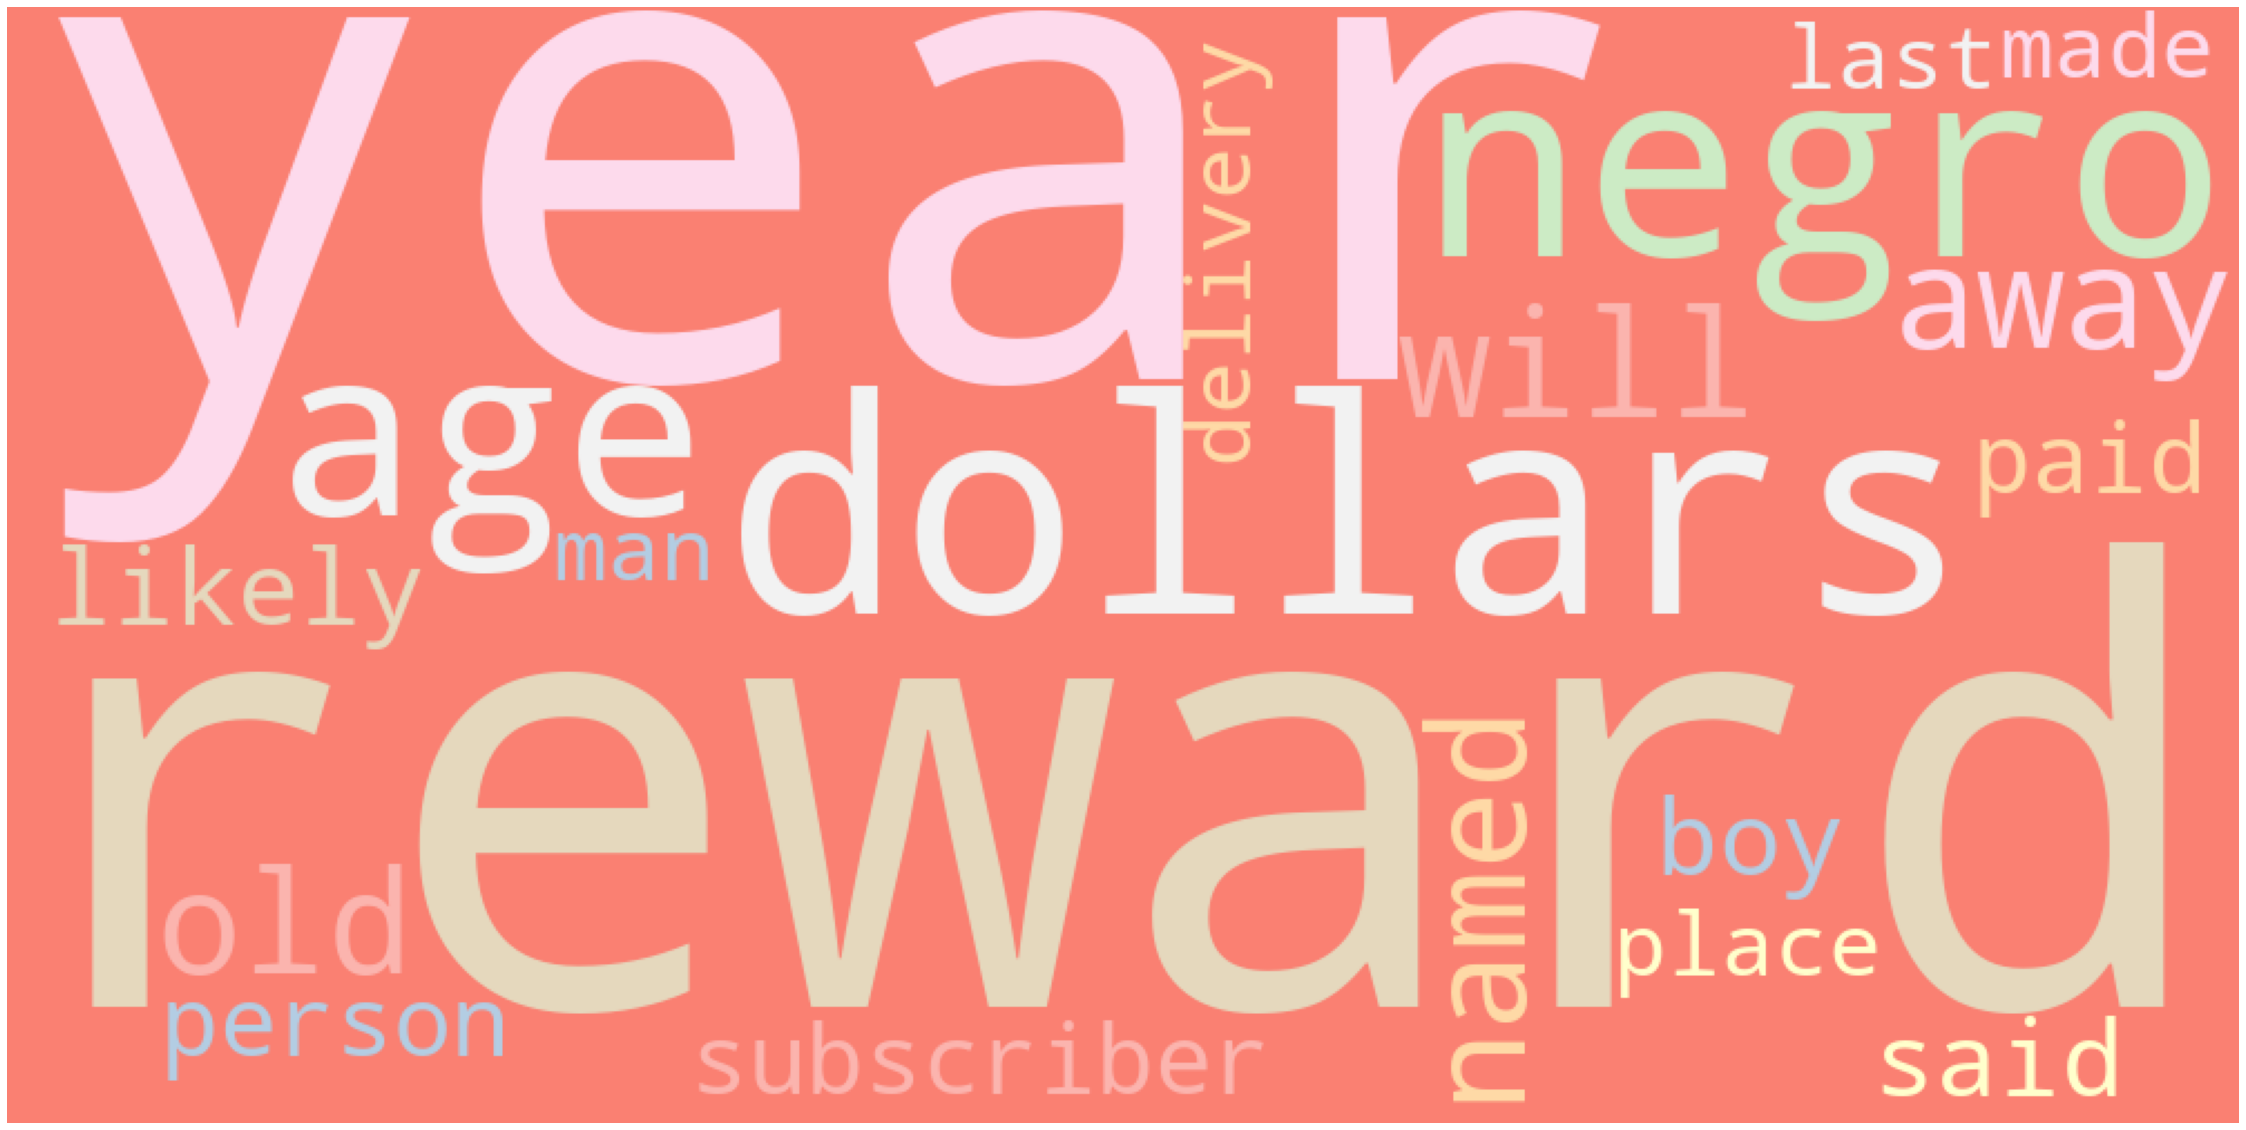

In [41]:
wordcloud_1 = WordCloud(width= 1000, height = 500, min_word_length = 3,
                        background_color='salmon', colormap='Pastel1',
                        collocations=False, stopwords = STOPWORDS, max_words = num_top).generate(str(t_df[0:10].values))
plot_cloud(wordcloud_1)

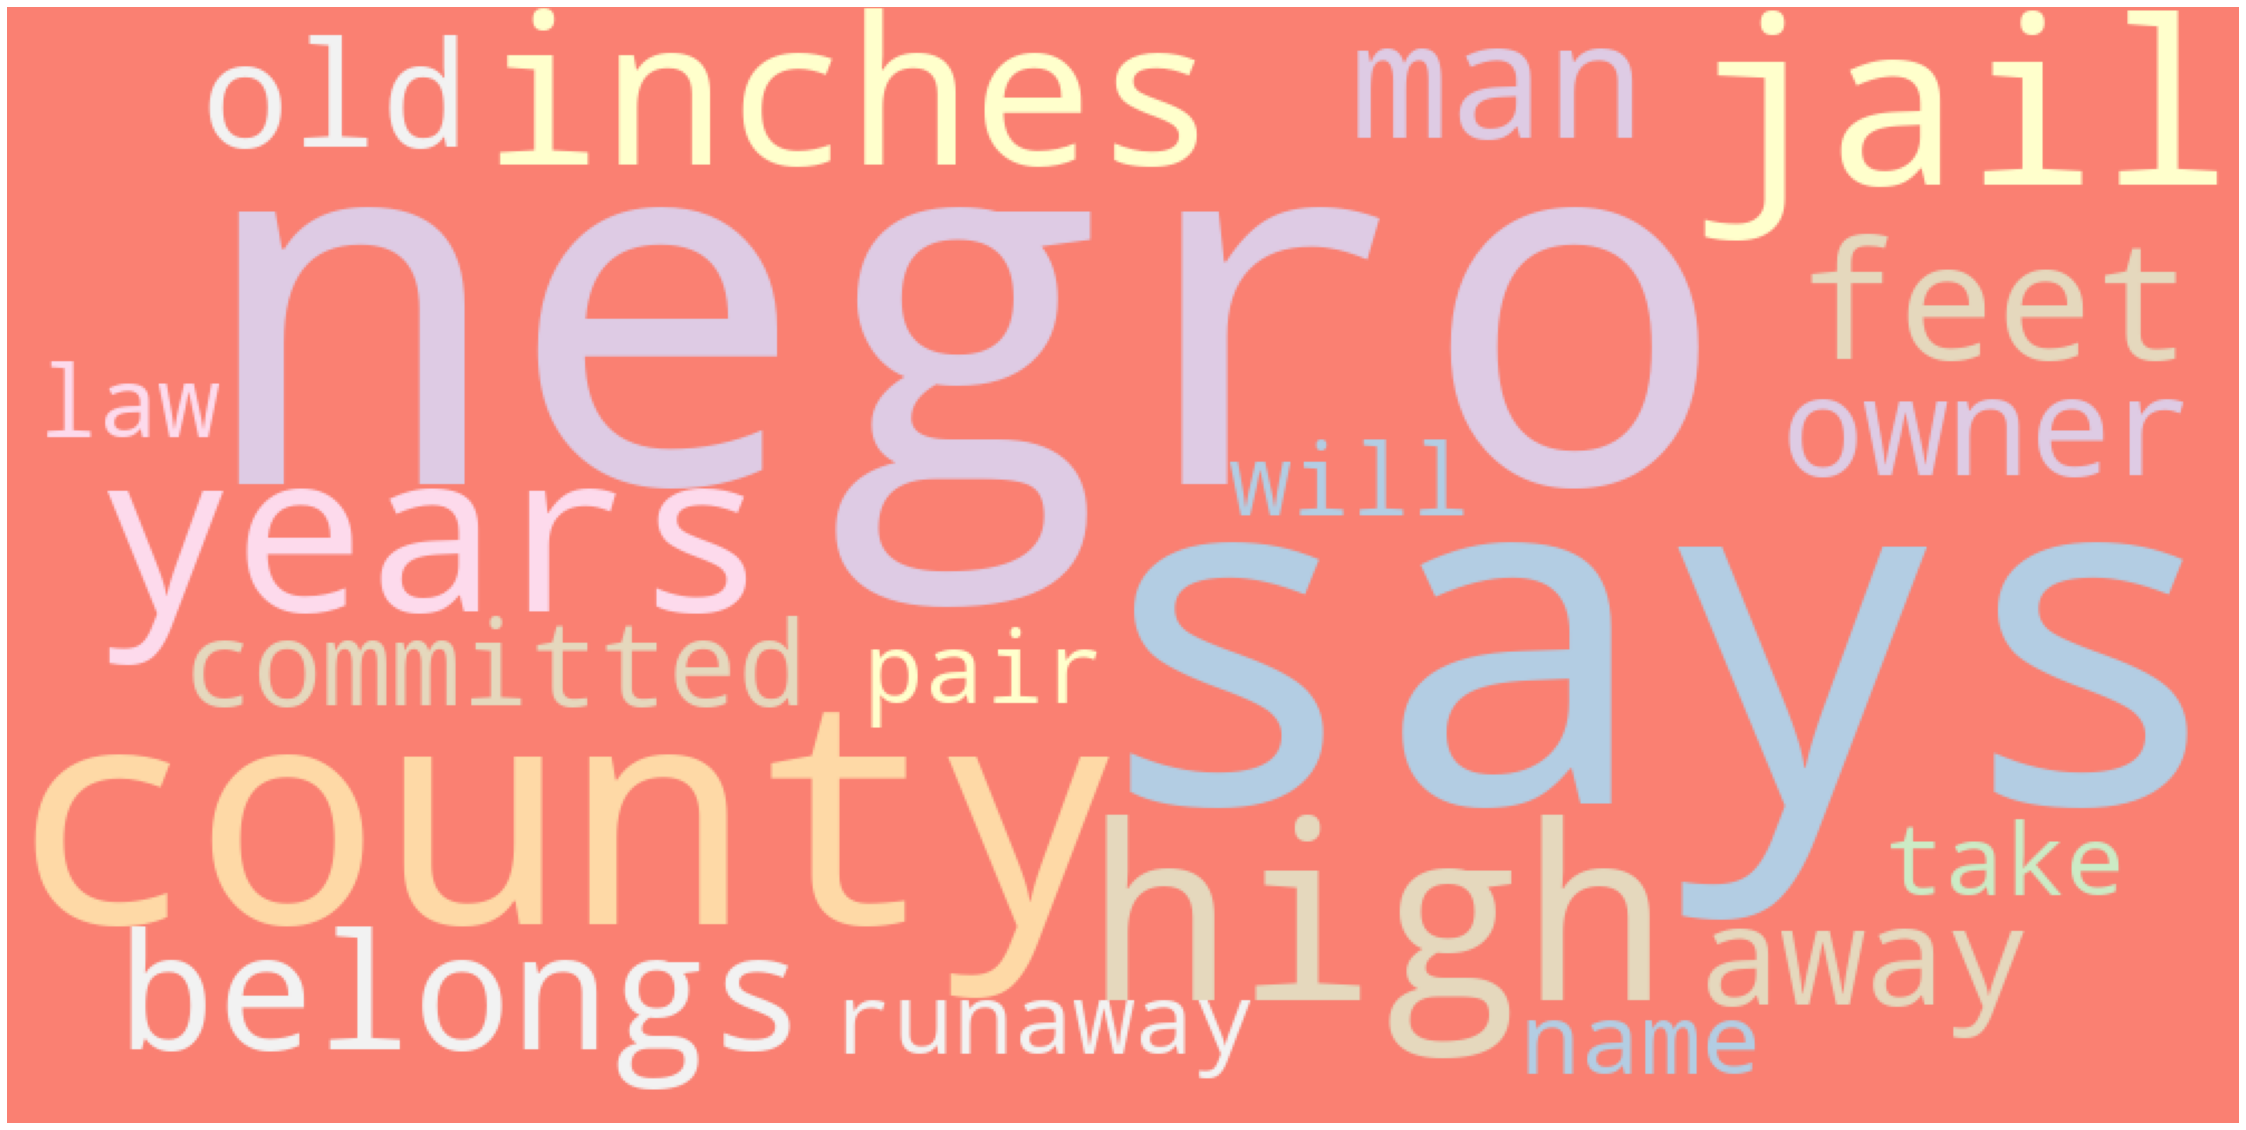

In [40]:
wordcloud_2 = WordCloud(width= 1000, height = 500, min_word_length = 3,
                        background_color='salmon', colormap='Pastel1',
                        stopwords = STOPWORDS, max_words = num_top, collocations=False).generate(str(z_df[0:10].values))
plot_cloud(wordcloud_2)